In [10]:
# %pip install wget
# !python -m wget  https://www.gutenberg.org/cache/epub/2000/pg2000.txt

In [11]:

# importamos las librerías necesarias

import time
import pandas as pd
import numpy as np
from pathlib import Path
import itertools
from textwrap import wrap

import decimal
# importamos el algoritmo de Chudnovsky de implementations/chudnovsky_altorendimiento.py
from implementations.chudnovsky_altorendimiento import pi_chudnovsky_bs





In [12]:
# importamos el archivo de texto del Quijote de la web de Gutenberg
# !python -m wget  https://www.gutenberg.org/cache/epub/2000/pg2000.txt

# definimos la ruta del archivo
recursos = Path.cwd() / "recursos"

quijote_file = recursos / 'primer_capitulo.txt'
quijote_file.exists()



True

In [13]:
# sea k el número de dígitos de precisión que se quieren calcular.
# este valor debe ser como máximo, el producto de n y el número total de caracteres del texto.

# por ejemplo, si n = 2, y el texto tiene 1000 caracteres, k = 2000.
# calcularemos el numero total de caracteres del texto

# abrimos el quijote como utf-8-sig, para evitar errores de codificación.    
with open(quijote_file, 'r', encoding='utf-8-sig') as file:
    # omitimos el copyright y los metadatos, para quedarnos solo con el texto íntegro de la obra.
    # leemos despues del caracter 27 hasta la línea -372.
    quijote_data = file.readlines()[36:-372]

# unimos todas las líneas en una sola cadena de texto.
quijote_data = ''.join(quijote_data)

# contamos los caracteres unicos del texto
caracteres = set(quijote_data)
# imprimimos los caracteres unicos
print(caracteres)
# imprimimos el número de caracteres unicos
print(len(caracteres))

# longitud en caracteres del texto
l = len(quijote_data)
print(l)

{'?', 'H', 'e', 'a', 'h', 'Q', '-', 'o', ' ', "'", '¡', 'ñ', ',', 'U', 'á', 'ü', 'F', ':', 'R', 'c', 'S', 'P', 'd', 'í', 'i', 'T', 't', 'm', 'f', '!', 'y', 'N', 'q', 'l', 'O', 'b', 's', 'L', 'v', 'A', '¿', 'r', 'é', 'I', 'B', '.', 'G', 'z', 'p', 'C', 'n', ';', 'M', 'ú', 'x', 'Y', '\n', 'g', 'D', 'u', 'j', 'E', 'ó'}
63
10378


In [14]:
# longitud en caracteres de cada trozo de pi. como minimo dos, 
# ya que el alfabeto y todos los caracteres imprimibles pueden rondar los 100

# por tanto, n será como minimo, el valor del orden de magnitud superior de n.

print ("el texto contiene %s caractereres, su alfabeto tiene %s caracteres unicos" % (l, len(caracteres)))
print ("por tanto, el valor de n debe ser como minimo %s" % len(str(len(caracteres))))
n = len(str(len(caracteres)))

# de encontrar una solución con esta longitud, estaríamos muy cerca de la solución optima.
# si no se encuentra una solución, se incrementa el valor de n en 1 y se vuelve a intentar.
# si se encuentra una solución, se imprime el valor de n y el tiempo que ha tardado en encontrarla.

el texto contiene 10378 caractereres, su alfabeto tiene 63 caracteres unicos
por tanto, el valor de n debe ser como minimo 2


In [15]:
# tenemos ya por tanto, una estimación del numero de decimales de pi que necesitamos 
# para nuestra primera aproximación.

print ("decimales de pi necesarios = n * l = %s * %s = %s" % (n, l, n*l))

# por conveniencia, redondeamos el valor de n*l al siguiente valor dentro del orden de magnitud.
# para ello primero calculamos el log10 de n*l, y luego redondeamos hacia abajo.

# calculamos el log10 de n*l
log10 = decimal.Decimal(n*l).log10()
# redondeamos hacia abajo, quedandonos con el valor entero, para obtener el orden de magnitud.
exp = int(log10)

# calculamos el valor de k
k = int(n*l / 10**exp) + 1
k_r =(k * 10**exp)
print ("redondeado = %s" % k_r)




decimales de pi necesarios = n * l = 2 * 10378 = 20756
redondeado = 30000


In [16]:
# generamos esa misma cantidad de decimales de pi
# para ello, usamos el algoritmo de Chudnovsky, que hemos importado al principio del notebook.

pi = pi_chudnovsky_bs(k_r)

decimal.getcontext().prec = k_r
# imprimimos los decimales de pi, sin la parte entera
pi  = decimal.Decimal(pi) + 0






In [17]:
# mapeamos los decimales de pi en trozos de n-elementos
# itertools.zip_longest se encarga de los impares sueltos

start = time.time()
# 
b = map(''.join, itertools.zip_longest(*[iter(str(pi)[2:])]*n, fillvalue=''))
end = time.time()
print(end - start)

# imprimimos los trozos de pi
# print (list(b))

0.0010013580322265625


In [18]:
# tantos trozos de pi como caracteres totales en texto
nlist = list(b)[:l]
# print(nlist)


In [19]:
# búsqueda: intenta crear un diccionario key:value en el que todo key sea único.
# si no lo consigue, sale del bucle.
# esta es una versión académica, pero se puede hacer más elegante.

res2 = {}
i=0
for key in nlist:
    if not key in res2:
        res2[key] = quijote_data[i]
    else:
        if res2[key] == quijote_data[i]:
            continue
        else:
            print ('not valid')
            break
    i = i+1

not valid


In [20]:
res2


{'14': '\n',
 '15': 'E',
 '92': 'n',
 '65': ' ',
 '35': 'u',
 '89': 'n',
 '79': ' ',
 '32': 'l',
 '38': 'u',
 '46': 'g',
 '26': 'a',
 '43': 'r'}

In [21]:
len(res2)

12

In [22]:
# todo junto hasta que lo encuentre:

def map_pi(n,l):
    pi = pi_chudnovsky_bs(n * l)

    decimal.getcontext().prec = n * l
    # imprimimos los decimales de pi, sin la parte entera
    pi  = decimal.Decimal(pi) + 0

    m = map(''.join, itertools.zip_longest(*[iter(str(pi)[2:])]*n, fillvalue=''))
    return list(m)[:l]

In [23]:
#loop
def busca_solucion(n, text):
    fin = False
    while not fin:
        # print("para n= %s" % n)
        solucion = {}
        keys = map_pi(n,len(text))
        #timer
        start = time.time()
        #loop principal
        fin = True
        for i, key in enumerate(keys):
            if not key in solucion:
                solucion[key] = text[i]
            else:
                if solucion[key] == text[i]:
                    continue
                else:
                    # print ('n= %s no es una solución válida' % n)
                    n = n+1
                    fin = False
                    end = time.time()
                    #print( 'F tiempo: %s' % (end - start))
                    break
    end = time.time()
    print ('n= %s es una solución válida' % n)
    print( 'OK tiempo: %s' % (end - start))
    return solucion

    

In [24]:
n=2 # valor inicial de n
solucion = busca_solucion(n, quijote_data)

if len(solucion) == len(quijote_data):
    print ("no es una solución óptima")

n= 8 es una solución válida
OK tiempo: 0.0010008811950683594
no es una solución óptima


In [25]:
# ahora vamos a comprobar como crece el valor de n en función del tamaño del texto
# para ello, vamos a generar una lista de textos de tamaño creciente, y vamos a medir el tiempo que tarda en encontrar una solución válida.

# generamos una lista de textos de tamaño creciente
# el tamaño de cada texto es el doble del anterior
# el primer texto tiene 100 caracteres, el segundo 200, el tercero 400, etc.
# el último texto tiene 2**20 caracteres, es decir, 1.048.576 caracteres tomados de la obra completa de Miguel de Cervantes.

# cargamos la obra completa de Miguel de Cervantes
quijote_file = recursos / 'pg2000.txt'

with open(quijote_file, 'r', encoding='utf-8-sig') as file:
    # omitimos el copyright y los metadatos, para quedarnos solo con el texto íntegro de la obra.
    # leemos despues del caracter 27 hasta la línea -372.
    quijote_data = file.readlines()[36:-372]


# unimos todas las líneas en una sola cadena de texto.
quijote_data = ''.join(quijote_data)

# contamos los caracteres unicos del texto
caracteres = set(quijote_data)
# imprimimos los caracteres unicos
print(caracteres)
# imprimimos el número de caracteres unicos
print(len(caracteres))

# longitud en caracteres del texto
l = len(quijote_data)
print(l)

# generamos una lista de textos de tamaño creciente
lista = []
for i in range(1,15):
    lista.append(quijote_data[:2**i])



{'6', 'h', ')', "'", 'ñ', ',', 'á', 'U', 'í', 'i', 'T', '!', 'q', 'O', 'X', 'v', 'A', 'r', 'ï', 'z', 'p', 'C', 'n', 'W', 'x', 'j', 'H', '4', 'Q', '-', 'o', '7', '3', 'F', 'c', 'Á', '1', '¿', 'Ñ', 'Z', ';', 'ú', 'D', 'u', 'a', 'ü', 'R', 'Ó', 'S', 'P', 'd', 'V', 't', 'm', 'f', 'y', 'N', 'b', 's', '«', 'B', '.', 'G', '"', 'M', 'g', 'É', '0', 'E', 'ó', '?', '5', 'e', '2', ' ', 'Ú', '¡', 'à', ']', ':', '(', 'l', 'Í', 'L', 'é', 'I', 'ù', 'J', '»', 'Y', '\n'}
91
2097953


In [26]:
# por cada texto de la lista, vamos a medir el tiempo que tarda en encontrar una solución válida.

for i, text in enumerate(lista):
    print ("l = %s, u = %s" % (len(text), len(set(text))))
    n=2 # valor inicial de n
    solucion = busca_solucion(n, text)
    # add solucion to list
    lista[i] = solucion

l = 2, u = 2
n= 2 es una solución válida
OK tiempo: 0.0
l = 4, u = 4
n= 2 es una solución válida
OK tiempo: 0.0
l = 8, u = 7
n= 2 es una solución válida
OK tiempo: 0.0
l = 16, u = 11
n= 3 es una solución válida
OK tiempo: 0.0
l = 32, u = 16
n= 4 es una solución válida
OK tiempo: 0.0
l = 64, u = 26
n= 4 es una solución válida
OK tiempo: 0.0
l = 128, u = 34
n= 4 es una solución válida
OK tiempo: 0.0
l = 256, u = 39
n= 5 es una solución válida
OK tiempo: 0.0
l = 512, u = 41
n= 6 es una solución válida
OK tiempo: 0.0
l = 1024, u = 49
n= 6 es una solución válida
OK tiempo: 0.0
l = 2048, u = 58
n= 7 es una solución válida
OK tiempo: 0.0
l = 4096, u = 58
n= 7 es una solución válida
OK tiempo: 0.0
l = 8192, u = 65
n= 8 es una solución válida
OK tiempo: 0.0010006427764892578
l = 16384, u = 73
n= 8 es una solución válida
OK tiempo: 0.0019724369049072266


In [27]:
# Los resultados de las observaciones se muestran en la siguiente tabla.
data = {
'l': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384],
'u': [1, 2, 4, 7, 11, 16, 26, 34, 39, 41, 49, 58, 58, 65, 73],
'n': [2, 2, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 7, 8, 8]
}

df = pd.DataFrame(data)
print(df)

        l   u  n
0       1   1  2
1       2   2  2
2       4   4  2
3       8   7  2
4      16  11  3
5      32  16  4
6      64  26  4
7     128  34  4
8     256  39  5
9     512  41  6
10   1024  49  6
11   2048  58  7
12   4096  58  7
13   8192  65  8
14  16384  73  8


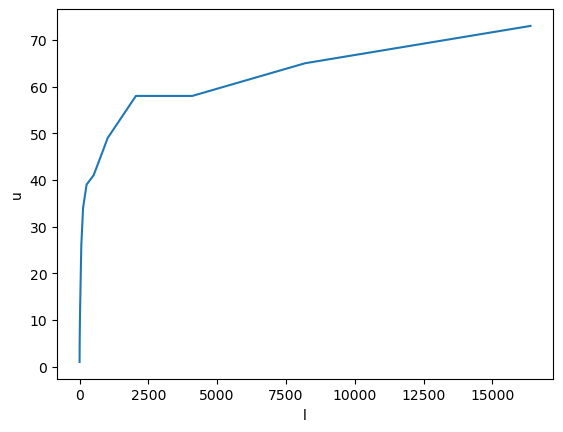

In [28]:
# ahora vamos a dibujar un gráfico de la evolución del tamaño del charset en función del tamaño del texto.
# para ello veremos que la linea dibuja una curva de crecimiento logarítmico.
# ovbiamente, al tratarse de números enteros, la curva no es exactamente logarítmica, pero se acerca bastante.


import matplotlib.pyplot as plt

plt.plot(df['l'], df['u'])
plt.xlabel('l')
plt.ylabel('u')
plt.show()


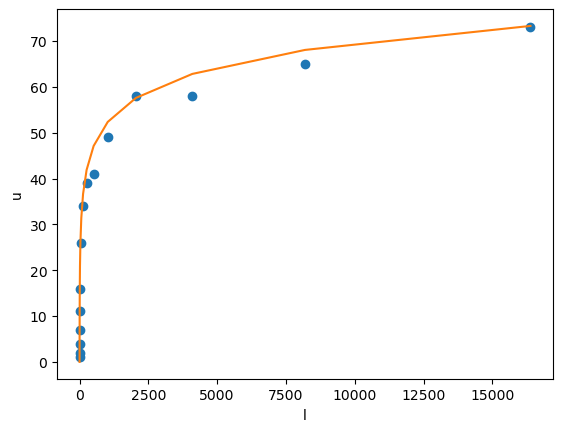

In [29]:
# tras varias pruebas, se ha podido constatar que en el tramo de valores que nos interesan, la curva de crecimiento es aproximadamente logarítmica
# concretamente a una funcion logaritmica de base pi-2.
# el siguiente gráfico compara para los mismos valores de l, la curva de crecimiento de u con la esperada por la función logarítmica de base pi-2.

import numpy as np

x = np.array(df['l'])
y = np.array(df['u'])
z = np.log(x) / np.log(np.pi-2)

plt.plot(x, y, 'o', x, z)
plt.xlabel('l')
plt.ylabel('u')
plt.show()

# no deja de ser ironico que la función que mejor se ajusta a los extractos del Quijote sea precisamente la función logarítmica de base pi-2.


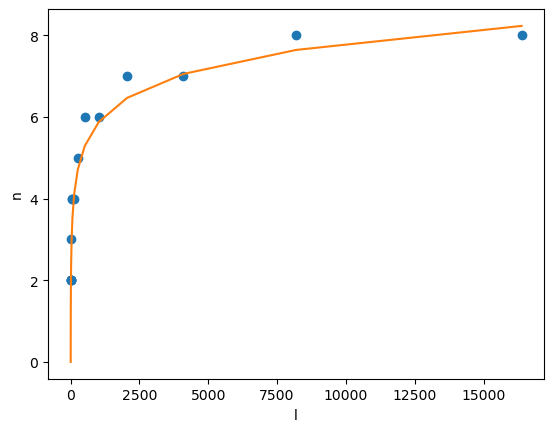

In [34]:
# una correlación similar se puede observar en el siguiente gráfico, que compara la evolución del valor de n con la esperada por la función logarítmica de base pi.

x = np.array(df['l'])
y = np.array(df['n'])
z = np.log(x) / np.log(3.25)

plt.plot(x, y, 'o', x, z)
plt.xlabel('l')
plt.ylabel('n')
plt.show()



In [61]:
# por tanto podemos concluir que el valor de l es el más importante a la hora de determinar el valor de n, puesto que u y n parecen dependientes de l de forma logarítmica.

# sabiendo que el quijote tiene 2.097.953 caracteres, podemos calcular el valor de n que se obtendría para este texto.
# adicinamente, podemos evaluar la validez de nuestra hipótesis, comprobando que el valor de u también se encuentra dentro del rango de valores esperados.



l = 2097953
u = 91

print ("El Quijote contiene %s caracteres, %s de ellos son únicos." % (l, u))
n_e = np.log(l) / np.log(np.pi)
u_e = np.log(l) / np.log(np.pi-2)
# u_e = np.log(l) / np.log(np.pi-1.9682)
print ("El valor de n esperado para el Quijote es %s, el valor de u esperado es %s." % (n_e, u_e))



El Quijote contiene 2097953 caracteres, 91 de ellos son únicos.
El valor de n esperado para el Quijote es 12.716076382157626, el valor de u esperado es 109.92292919403008.


In [62]:
print(12 * l)

25175436


La complejidad de este algoritmo es de $ \mathcal{O}( l  n^2 \log(n)^3 + l n) $, donde $l$ es la longitud de caracteres, y $n$ es el tamaño de los trozos de pi.